# **Project 2: House Price Estimator**

## **📝 Description:**
- *Create a regression model to predict house prices based on various features such as location, size, number of bedrooms, and amenities. Use data visualization to show the distribution of house prices and feature importance.*


## **🔧 Project Structure:**

1. **🧠 Define the Problem:** Understand the objective and type of problem (classification, regression, etc.).
2. **🗂️ Collect and Prepare Data:** Obtain the dataset, handle missing values, and preprocess data.
3. **📊 Exploratory Data Analysis (EDA):** Visualize data to understand patterns and correlations.
4. **📐 Feature Engineering:** Select and create relevant features.
5. **🔀 Split the Data:** Divide the dataset into training and testing sets.
6. **🤖 Choose a Model:** Select a suitable machine learning algorithm.
7. **🏋️ Train the Model:** Train the model using the training set.
8. **📈 Evaluate the Model:** Use appropriate metrics to evaluate the model on the test set.
9. **🔧 Improve the Model:** Tune hyperparameters, try different algorithms, or enhance features.
10. **🚀 Deploy the Model (optional):** Create an application or API to make predictions using the trained model.

##  **🧪 I’ll experiment with:**

- **Linear Regression** – for baseline performance.

- **Random Forest Regressor** – to capture non-linear relationships.

- **Gradient Boosting Regressor** – for improved accuracy through boosting.

- **XGBoost Regressor** – optimized gradient boosting with regularization.

- **Lasso & Ridge Regression** – to manage multicollinearity and feature selection.



# **1. 🧠 Define the Problem:**




## **Objective:**
- Predict house prices based on various features of the houses and their location. This is a Regression problem because the target variable (price) is continuous.

## **Understanding:**
- The goal is to build a model that can accurately estimate the price of a house given its characteristics. This could be used for various purposes, such as:
   - Real estate valuation
   - Identifying undervalued or overvalued properties
   - Understanding factors that influence housing prices
   

## **🔍 Type:**
- Regression



###  **Reason:**
- *The target variable (house price) is **continuous and numeric**, and the goal is to **predict a numeric value**, which makes it a **regression problem**.*

In [73]:
# Create images directory to save all visualizations
import os
if not os.path.exists('images'):
    os.makedirs('images')
    print("✅ Created 'images' directory")
else:
    print("✅ 'images' directory already exists")


✅ Created 'images' directory


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
import pickle

import warnings
warnings.filterwarnings("ignore")

# **Import Libraries:**
- Bring in all the necessary tools for data manipulation, math, visualization, machine learning, and saving models.

# **2. 🗂️ Collect and Prepare Data:**

- Load the house data from a file.
- Show the first few rows to get a feel for the data.
- Check what kind of data each column contains (numbers, text, etc.).
- Get some basic statistics (mean, min, max) for the numerical columns.
- Check for missing values in the data. If there are missing values, find them and deal with them.

## **📥 Read the CSV Files**

In [39]:
try:
    df = pd.read_csv("kc_house_data.csv")
    print("Data loaded successfully.")  #Basic feedback
except FileNotFoundError:
    print("Error: The specified data file was not found.")
    exit()  # Exit if the file doesn't exist.  You might want a more graceful recovery in a real application.
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    exit()


Data loaded successfully.


In [40]:
# Initial Data Validation
df.head().style.background_gradient(cmap='plasma')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000000,3,1.000000,1180,5650,1.000000,0,0,3,7,1180,0,1955,0,98178,47.511200,-122.257000,1340,5650
1,6414100192,20141209T000000,538000.000000,3,2.250000,2570,7242,2.000000,0,0,3,7,2170,400,1951,1991,98125,47.721000,-122.319000,1690,7639
2,5631500400,20150225T000000,180000.000000,2,1.000000,770,10000,1.000000,0,0,3,6,770,0,1933,0,98028,47.737900,-122.233000,2720,8062
3,2487200875,20141209T000000,604000.000000,4,3.000000,1960,5000,1.000000,0,0,5,7,1050,910,1965,0,98136,47.520800,-122.393000,1360,5000
4,1954400510,20150218T000000,510000.000000,3,2.000000,1680,8080,1.000000,0,0,3,8,1680,0,1987,0,98074,47.616800,-122.045000,1800,7503


In [41]:
print("\nData types of each column:")
df.dtypes


Data types of each column:


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [42]:
print("\nSummary statistics of numerical columns:")
df.describe().style.background_gradient(cmap='tab20c') # Quick overview of the data


Summary statistics of numerical columns:


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4580301520.864988,540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2876565571.312057,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1000102.000000,75000.000000,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2123049194.000000,321950.000000,3.000000,1.750000,1427.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3904930410.000000,450000.000000,3.000000,2.250000,1910.000000,7618.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7308900445.000000,645000.000000,4.000000,2.500000,2550.000000,10688.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9900000190.000000,7700000.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [43]:
print("\nChecking for missing values:")
df.isnull().sum() # Check for missing values


Checking for missing values:


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [44]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# **🧹Data Cleaning and Preprocessing**
- Transform the "date" column into year and month columns.
- Remove the original "id" and "date" columns because they are no longer needed.
- Create an "age" column to represent how old the house is based on the sale year and built year.
- Create a "renovated" column to indicate if the house has been renovated (1 for yes, 0 for no).
- Fill in any missing values in numerical columns using the median value for that column. This is a common way to handle missing data.
- Handle outliers (extreme values) in the 'sqft_living' column by capping them at reasonable limits.

In [45]:
# Date Feature Engineering
df['date'] = pd.to_datetime(df['date'])
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month
df.drop(['id', 'date'], axis=1, inplace=True)  # Drop 'id' and 'date'

# Age Feature Engineering
df['age'] = df['sale_year'] - df['yr_built']

# Renovated Feature Engineering
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [46]:
# Missing Value Imputation (Example using median for numerical columns)
for col in df.select_dtypes(include=np.number): # Select numerical columns
    if df[col].isnull().any():  # Check if there are any missing values
        median_val = df[col].median() #Calculate median
        df[col].fillna(median_val, inplace=True) # Fill missing values with the median
        print(f"Missing values in column '{col}' filled with median: {median_val}")

In [47]:
# Outlier Handling (Example using capping for sqft_living - adjust thresholds based on EDA)
Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['sqft_living'] = np.where(df['sqft_living'] < lower_bound, lower_bound, df['sqft_living'])
df['sqft_living'] = np.where(df['sqft_living'] > upper_bound, upper_bound, df['sqft_living'])
print("\nOutliers Capped")


Outliers Capped


# **3. 📊 Exploratory Data Analysis (EDA)**
- Visualize the data

## **3.1. House Price Distribution:**
- Histogram with KDE to see the price spread and skewness.
- Analysis: Observe the skewness of the price distribution. Consider a log transformation if heavily skewed.

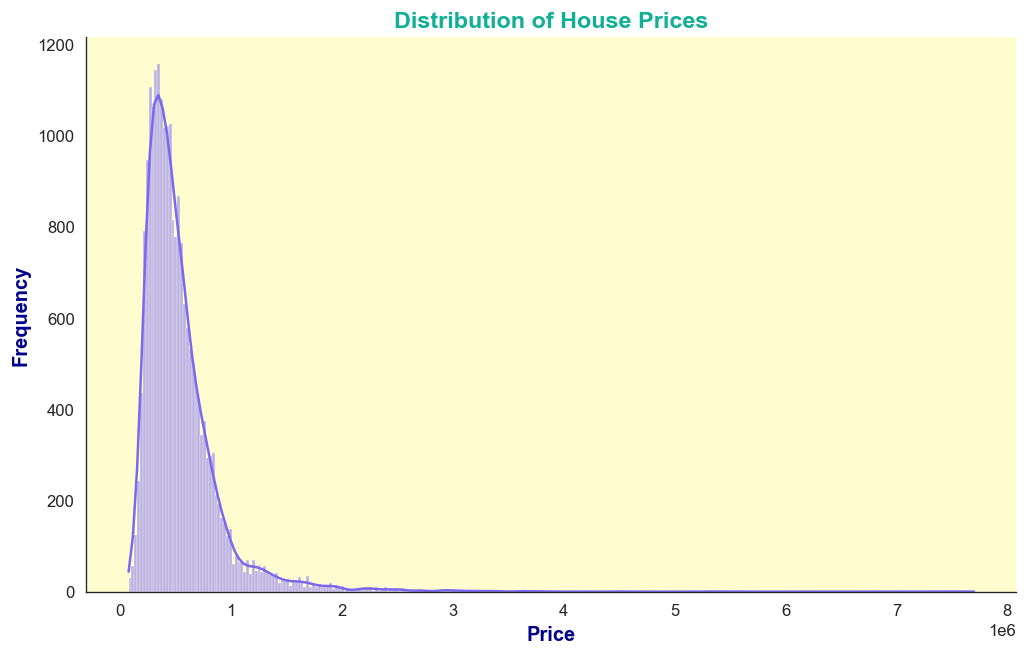

Mean Price: $540,088
Skewness of Price: 4.02
💾 Saved: images/01_price_distribution.png


In [76]:
sns.set_style("white")  # Clean base style

plt.figure(figsize=(10, 6), dpi=120)
sns.histplot(df['price'], kde=True, color='mediumslateblue')
plt.title('Distribution of House Prices', fontsize=14, fontweight='bold', color='#11af95')
plt.xlabel('Price', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='darkblue')
plt.gca().set_facecolor('#fffdd0')
sns.despine()
plt.grid(False)
plt.savefig('images/01_price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Mean Price: ${:,.0f}".format(df['price'].mean()))
print("Skewness of Price: {:.2f}".format(df['price'].skew()))
print("💾 Saved: images/01_price_distribution.png")

## **3.2. Square Footage vs. Price:**
- Price: Scatter plot to see the relationship and correlation between house sizes and their price.

- Analysis: Observe the general trend; outliers might need handling.

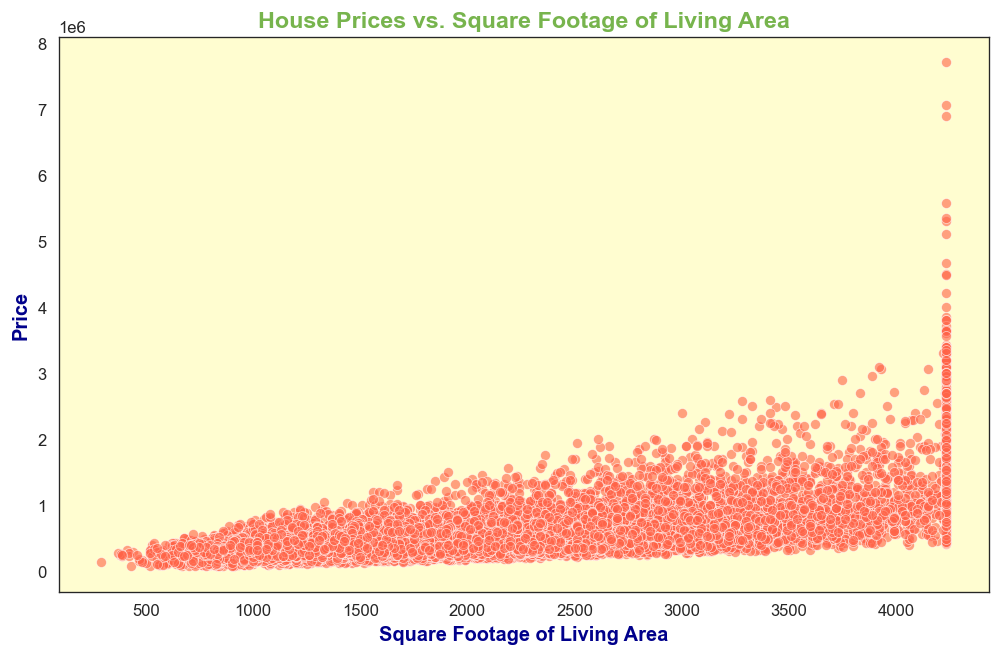

Correlation between sqft_living and price: 0.65
💾 Saved: images/02_sqft_vs_price.png


In [77]:
plt.figure(figsize=(10, 6), dpi=120)
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.6, color='tomato')
plt.title('House Prices vs. Square Footage of Living Area', fontsize=14, fontweight='bold', color='#77b44d')
plt.xlabel('Square Footage of Living Area', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Price', fontsize=12, fontweight='bold', color='darkblue')
plt.gca().set_facecolor('#fffdd0')
plt.savefig('images/02_sqft_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()
print("Correlation between sqft_living and price: {:.2f}".format(df['sqft_living'].corr(df['price'])))
print("💾 Saved: images/02_sqft_vs_price.png")

## **3.3. Bedrooms vs. Average Price:**
- Bar plot to see how price changes with the number of bedrooms.
- Analysis: Note the relationship between the number of bedrooms and price. Consider creating bedroom categories (e.g., 1-2, 3-4, 5+).

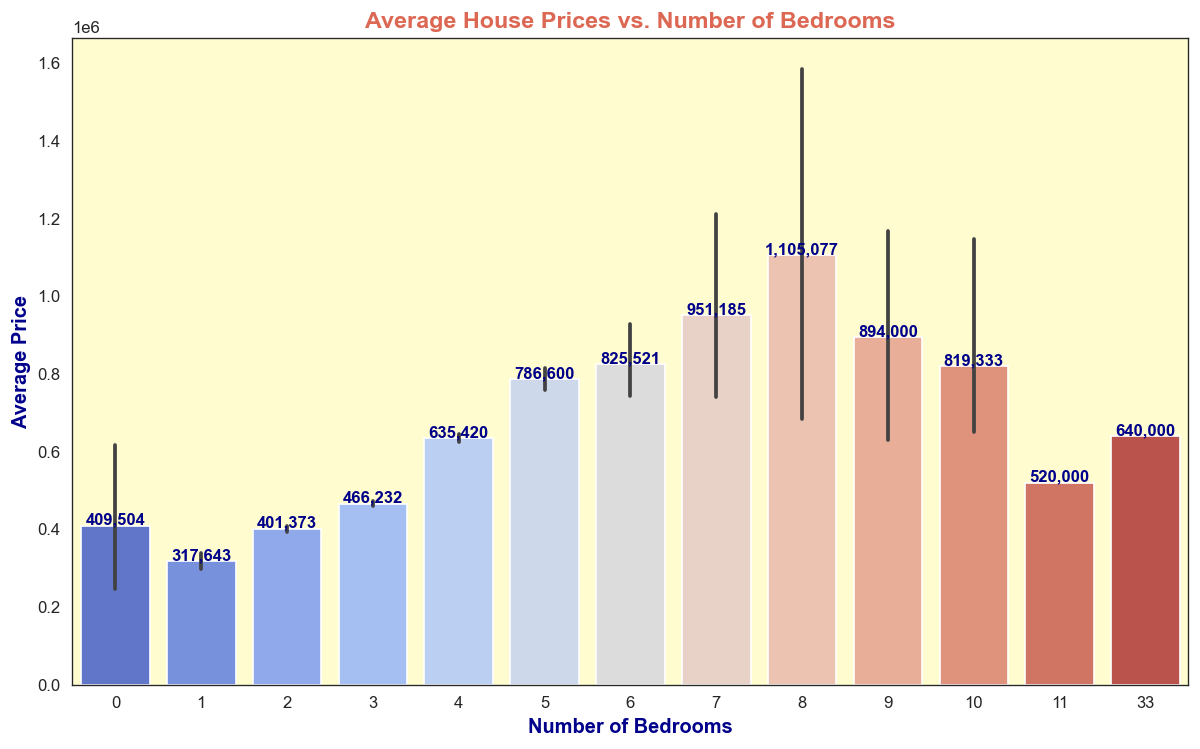

bedrooms
0      409504.0
1      317643.0
2      401373.0
3      466232.0
4      635420.0
5      786600.0
6      825521.0
7      951185.0
8     1105077.0
9      894000.0
10     819333.0
11     520000.0
33     640000.0
Name: price, dtype: float64
💾 Saved: images/03_bedrooms_vs_price.png


In [78]:
plt.figure(figsize=(12, 7), dpi=120)
ax = sns.barplot(x='bedrooms', y='price', data=df, palette='coolwarm')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3000, '{:,.0f}'.format(height),
            ha="center", fontsize=10, fontweight='bold', color='darkblue')
plt.title('Average House Prices vs. Number of Bedrooms', fontsize=14, fontweight='bold', color='#dc6753')
plt.xlabel('Number of Bedrooms', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Average Price', fontsize=12, fontweight='bold', color='darkblue')
plt.gca().set_facecolor('#fffdd0')
plt.savefig('images/03_bedrooms_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()
print(df.groupby('bedrooms')['price'].mean().round(0))
print("💾 Saved: images/03_bedrooms_vs_price.png")

## **3.4. Correlation Heatmap:**
- To visualize the relationships between the features to the price.
- Analysis: Identify features highly correlated with 'price' and each other. Consider removing highly correlated features to reduce multicollinearity.

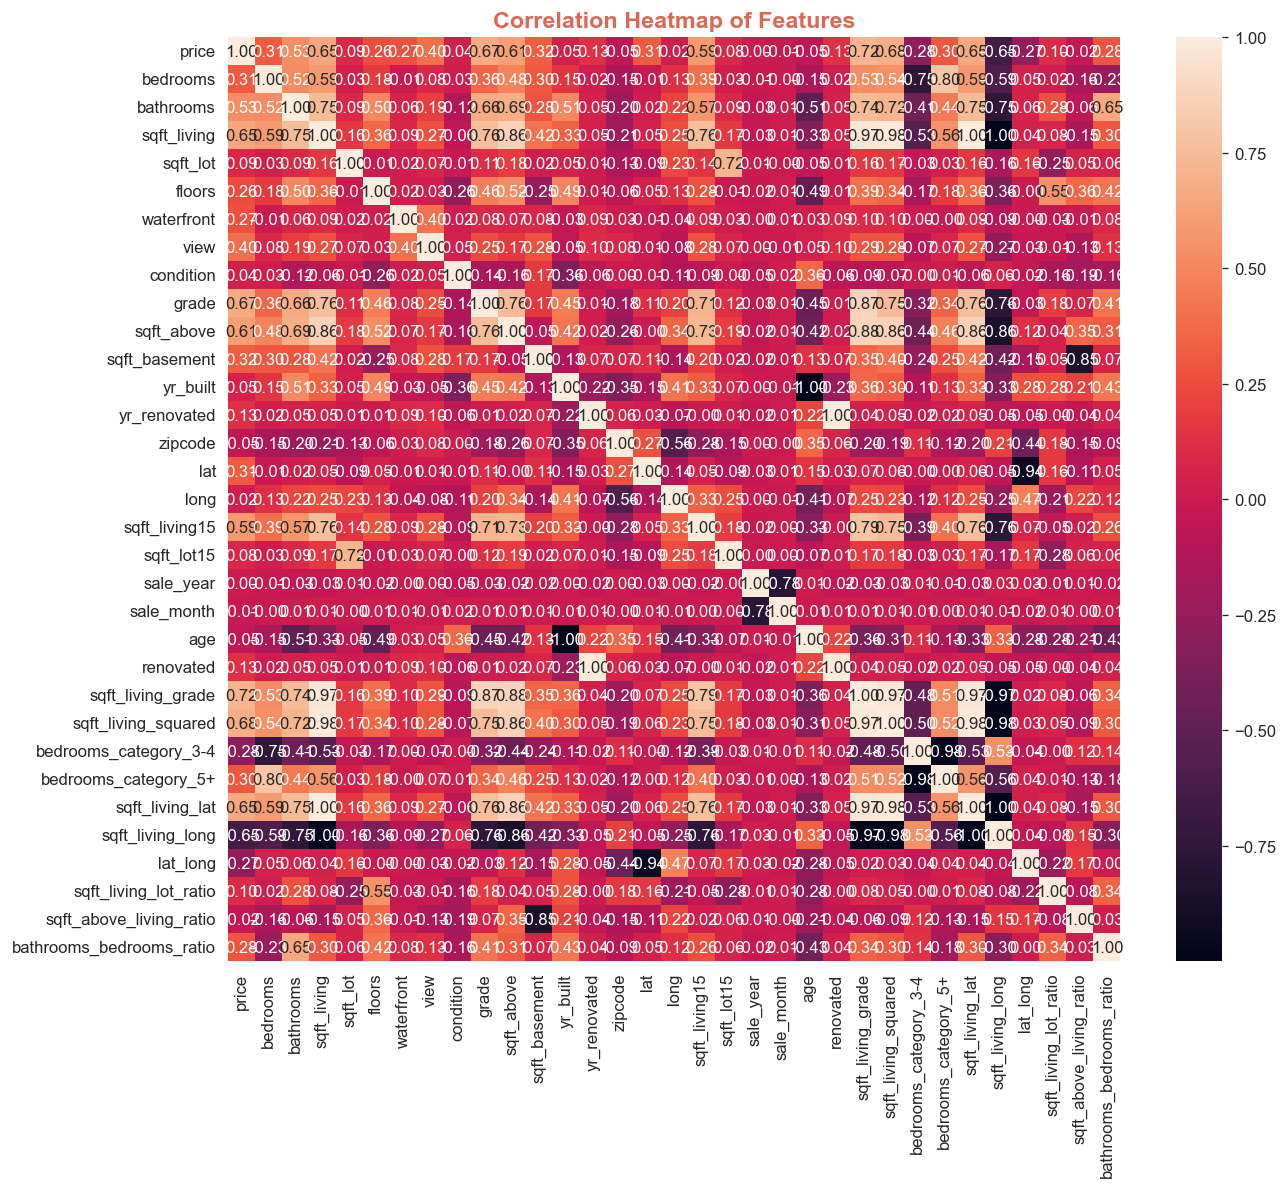

Top correlations with price:
 price                  1.000000
sqft_living_grade      0.716171
sqft_living_squared    0.680211
grade                  0.667434
sqft_living_lat        0.649139
Name: price, dtype: float64
Top correlations with price:
 price                  1.000000
sqft_living_grade      0.716171
sqft_living_squared    0.680211
grade                  0.667434
sqft_living_lat        0.649139
Name: price, dtype: float64
💾 Saved: images/04_correlation_heatmap.png


In [86]:
plt.figure(figsize=(12, 10), dpi=120)
sns.heatmap(df.corr(), annot=True, cmap='rocket', fmt=".2f")
plt.title('Correlation Heatmap of Features', fontsize=14, fontweight='bold', color='#dc6753')
plt.gca().set_facecolor('#fffdd0')
plt.savefig('images/04_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("Top correlations with price:\n", df.corr()['price'].sort_values(ascending=False).head(5))
print("Top correlations with price:\n", df.corr()['price'].sort_values(ascending=False).head(5))
print("💾 Saved: images/04_correlation_heatmap.png")

## **3.5. House prices vs location:**
- Scatter plot of houses by price using longitude and latitude.
- Analysis: Check the price variation across different locations

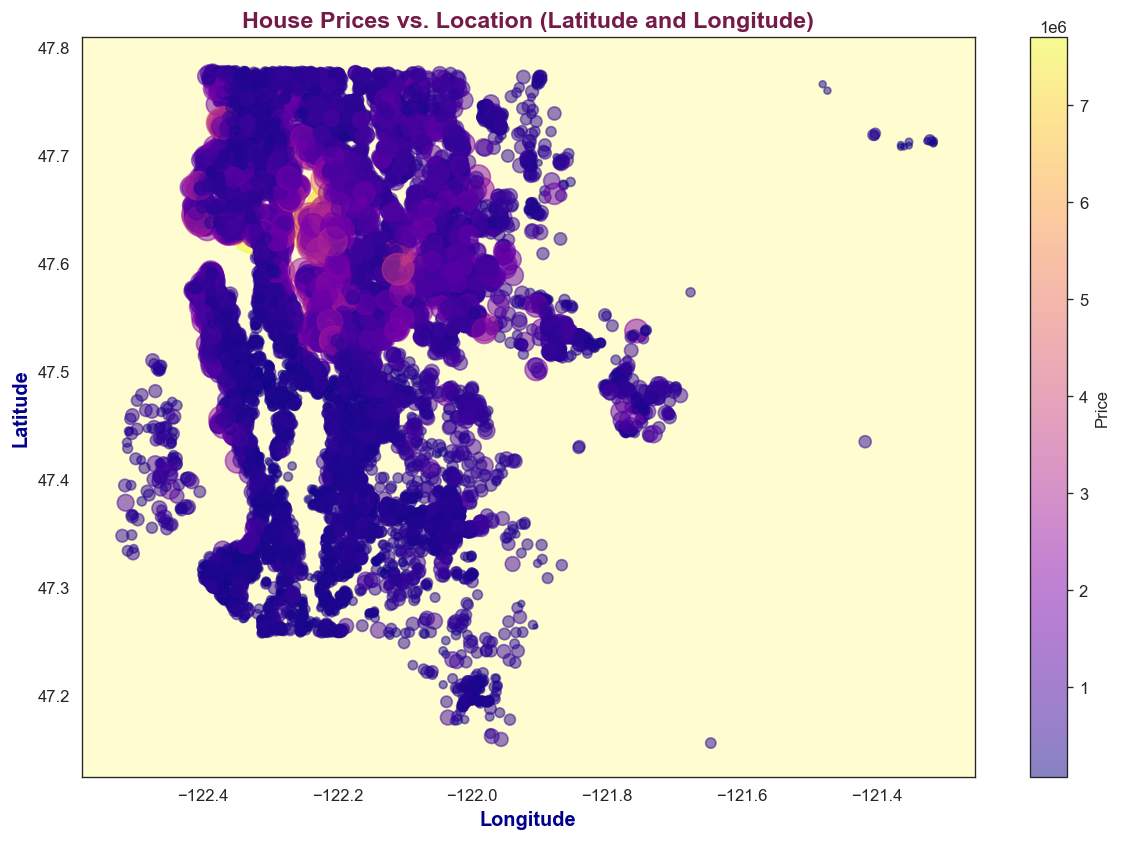

Longitude range: -122.519 to -121.315
Latitude range: 47.1559 to 47.7776
💾 Saved: images/05_location_vs_price.png


In [83]:
plt.figure(figsize=(12, 8), dpi=120)
scatter = plt.scatter(x=df['long'], y=df['lat'], c=df['price'], cmap='plasma', s=df['price']/10000, alpha=0.5)
plt.title('House Prices vs. Location (Latitude and Longitude)', fontsize=14, fontweight='bold', color='#741b47')
plt.xlabel('Longitude', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Latitude', fontsize=12, fontweight='bold', color='darkblue')
plt.colorbar(scatter, label='Price')
plt.gca().set_facecolor('#fffdd0')
plt.savefig('images/05_location_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()
print("Longitude range:", df['long'].min(), "to", df['long'].max())
print("Latitude range:", df['lat'].min(), "to", df['lat'].max())
print("💾 Saved: images/05_location_vs_price.png")

## **3.6. Average Price vs. Grade:**
- Visualize the connection between grade and average price.
- Analysis: relationship between the grade and price

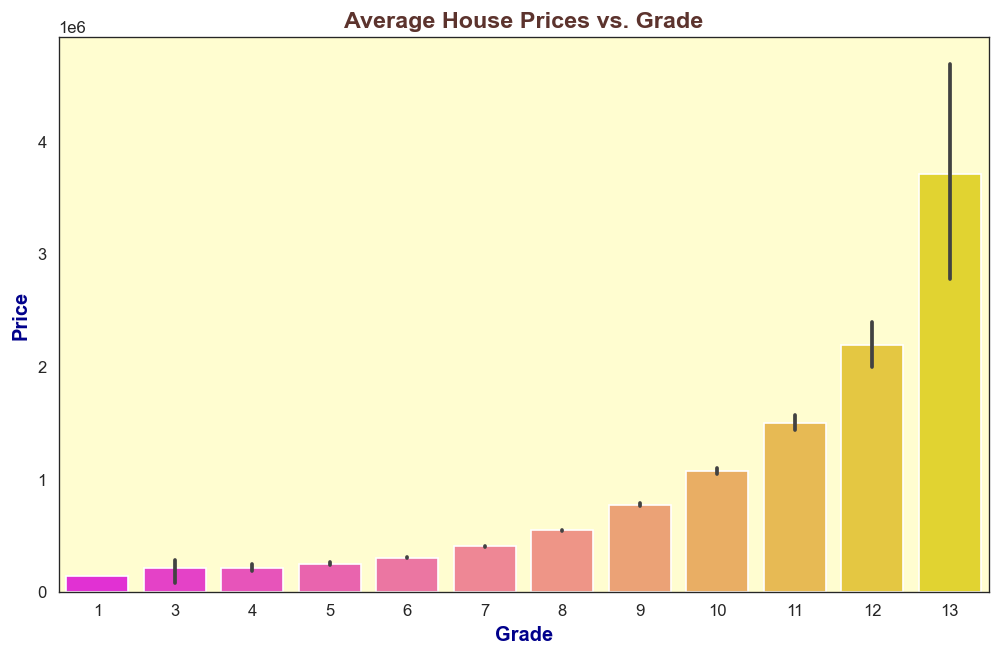

grade
1      142000.0
3      205667.0
4      214381.0
5      248524.0
6      301920.0
7      402590.0
8      542853.0
9      773513.0
10    1071771.0
11    1496842.0
12    2191222.0
13    3709615.0
Name: price, dtype: float64
💾 Saved: images/06_grade_vs_price.png


In [87]:
plt.figure(figsize=(10, 6), dpi=120)
sns.barplot(x='grade', y='price', data=df, palette='spring')
plt.title('Average House Prices vs. Grade', fontsize=14, fontweight='bold', color='#5c332d')
plt.xlabel('Grade', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Price', fontsize=12, fontweight='bold', color='darkblue')
plt.gca().set_facecolor('#fffdd0')
plt.savefig('images/06_grade_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()
print(df.groupby('grade')['price'].mean().round(0))
print("💾 Saved: images/06_grade_vs_price.png")

## **3.7. Year Built vs. Price:**
- See the connection between the year built and the average price.
- Analysis: Trend analysis

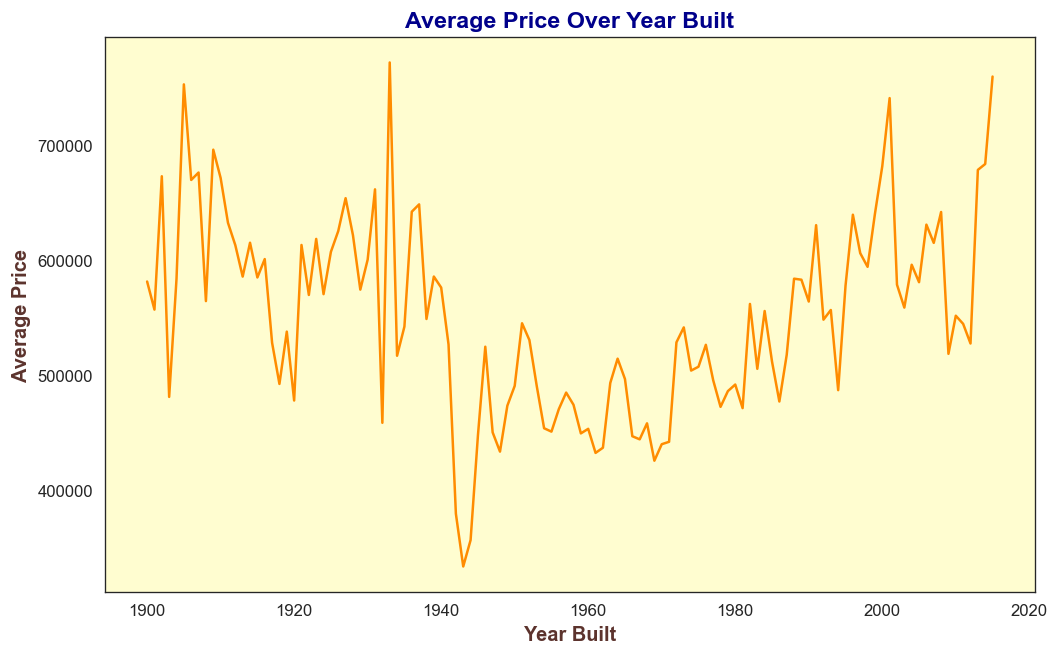

Most expensive average price year: yr_built      1933.0
price       772050.0
Name: 33, dtype: float64
💾 Saved: images/07_year_built_vs_price.png


In [84]:
plt.figure(figsize=(10, 6), dpi=120)
yearly_price = df.sort_values("yr_built").groupby("yr_built")['price'].mean().reset_index()
sns.lineplot(data=yearly_price, x='yr_built', y='price', color='darkorange')
plt.title("Average Price Over Year Built", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Year Built", fontsize=12, fontweight='bold', color='#5c332d')
plt.ylabel("Average Price", fontsize=12, fontweight='bold', color='#5c332d')
plt.gca().set_facecolor('#fffdd0')
plt.savefig('images/07_year_built_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()
print("Most expensive average price year:", yearly_price.sort_values('price', ascending=False).iloc[0])
print("💾 Saved: images/07_year_built_vs_price.png")

## **3.8. Waterfront vs. Price:**
- Box plot to visualize the price difference based on waterfront location.
- Analysis: price variation between waterfront and non waterfront locations

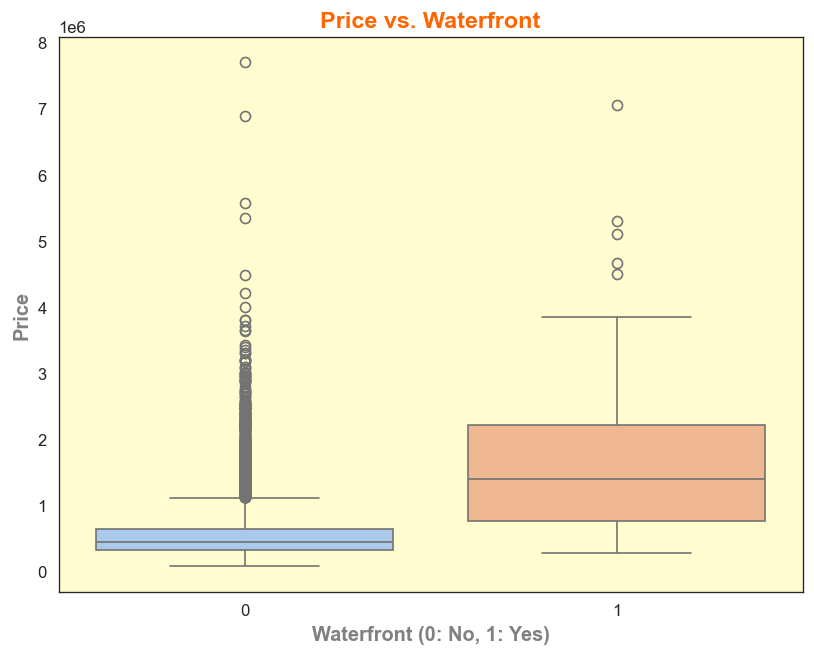

Average price by waterfront:
 waterfront
0     531564.0
1    1661876.0
Name: price, dtype: float64
💾 Saved: images/08_waterfront_vs_price.png


In [88]:
plt.figure(figsize=(8, 6), dpi=120)
sns.boxplot(x='waterfront', y='price', data=df, palette='pastel')
plt.title('Price vs. Waterfront', fontsize=14, fontweight='bold', color='#ff6600')
plt.xlabel('Waterfront (0: No, 1: Yes)', fontsize=12, fontweight='bold', color='#808080')
plt.ylabel('Price', fontsize=12, fontweight='bold', color='#808080')
plt.gca().set_facecolor('#fffdd0')
plt.savefig('images/08_waterfront_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()
print("Average price by waterfront:\n", df.groupby('waterfront')['price'].mean().round(0))
print("💾 Saved: images/08_waterfront_vs_price.png")

## **3.9. Square Footage Living Area Distribution:**
- Histogram with KDE to see the distribution of sqft_living and skewness.
- Analysis: General trend

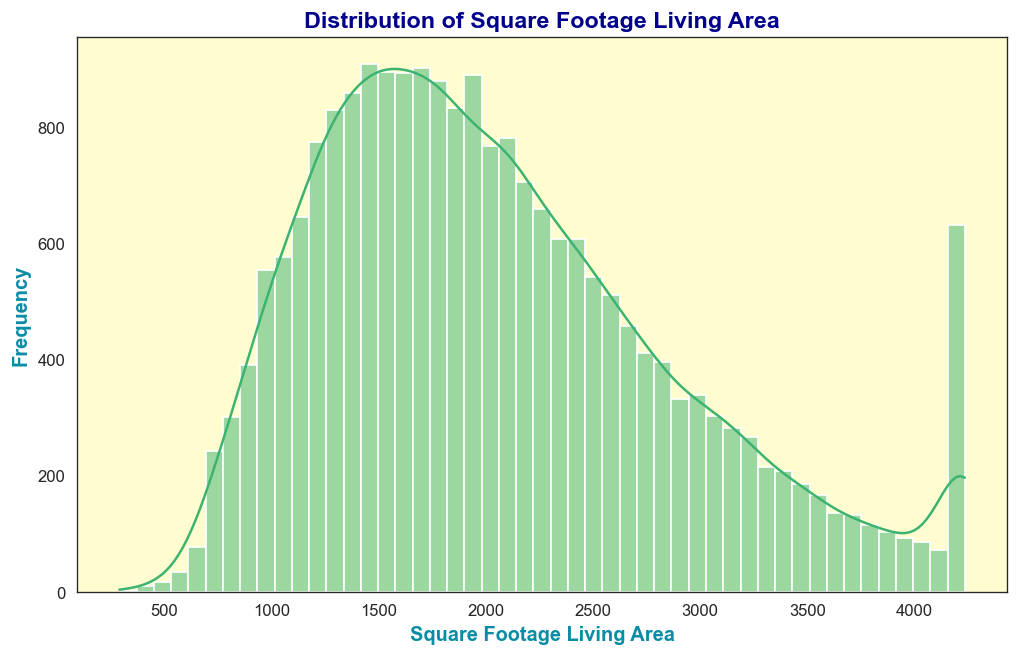

Skewness of sqft_living: 0.73
💾 Saved: images/09_sqft_living_distribution.png


In [89]:
plt.figure(figsize=(10, 6), dpi=120)
sns.histplot(df['sqft_living'], kde=True, color='mediumseagreen')
plt.title('Distribution of Square Footage Living Area', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Square Footage Living Area', fontsize=12, fontweight='bold', color='#088da5')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='#088da5')
plt.gca().set_facecolor('#fffdd0')
plt.savefig('images/09_sqft_living_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Skewness of sqft_living: {:.2f}".format(df['sqft_living'].skew()))
print("💾 Saved: images/09_sqft_living_distribution.png")

## **3.10. Bathrooms vs. Price:**
- See the relationships between number of bathrooms and house price.
- Analysis: Correlation trend

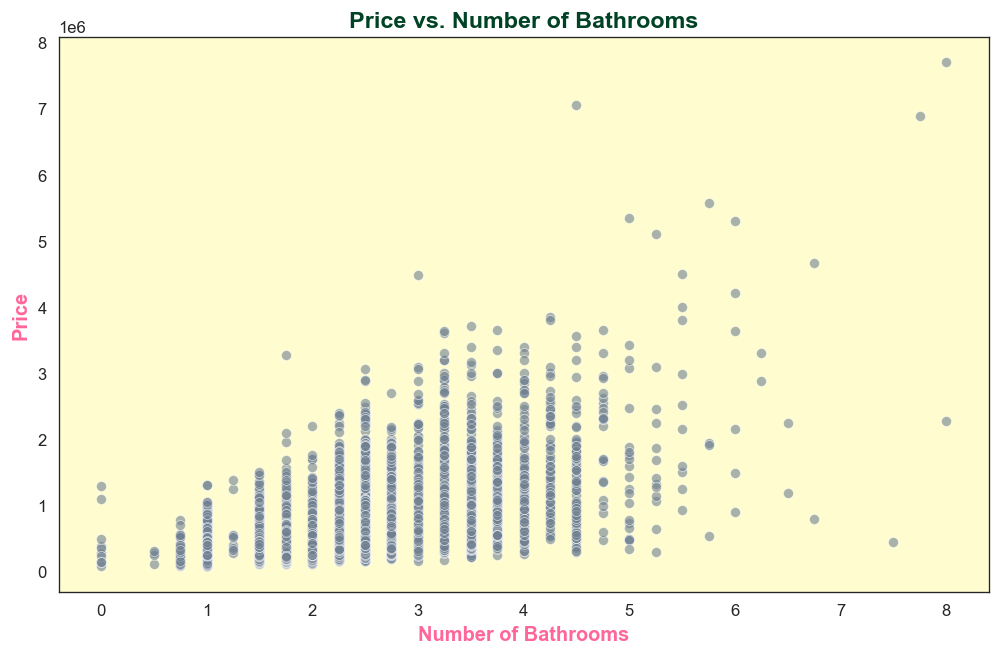

Correlation between bathrooms and price: 0.53
💾 Saved: images/10_bathrooms_vs_price.png


In [90]:
plt.figure(figsize=(10, 6), dpi=120)
sns.scatterplot(x='bathrooms', y='price', data=df, color='slategray', alpha=0.6)
plt.title('Price vs. Number of Bathrooms', fontsize=14, fontweight='bold', color='#004225')
plt.xlabel('Number of Bathrooms', fontsize=12, fontweight='bold', color='#ff6699')
plt.ylabel('Price', fontsize=12, fontweight='bold', color='#ff6699')
plt.gca().set_facecolor('#fffdd0')
plt.savefig('images/10_bathrooms_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()
print("Correlation between bathrooms and price: {:.2f}".format(df['bathrooms'].corr(df['price'])))
print("💾 Saved: images/10_bathrooms_vs_price.png")

## **3.11.Count of Conditions:**
- See how the distribution of the condition affects the house price.
- Analysis: Condition count

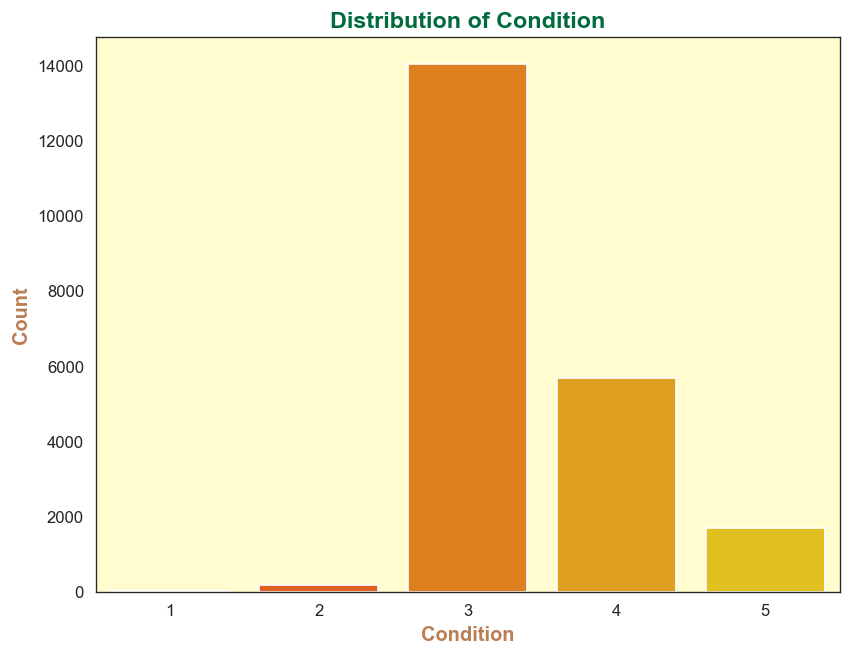

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64
💾 Saved: images/11_condition_distribution.png


In [91]:
plt.figure(figsize=(8, 6), dpi=120)
sns.countplot(x='condition', data=df, palette='autumn')
plt.title('Distribution of Condition', fontsize=14, fontweight='bold', color='#006b3c')
plt.xlabel('Condition', fontsize=12, fontweight='bold', color='#ba7d54')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='#ba7d54')
plt.gca().set_facecolor('#fffdd0')
plt.savefig('images/11_condition_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print(df['condition'].value_counts())
print("💾 Saved: images/11_condition_distribution.png")

# **4. 📐 Feature Engineering**
- Reuse/copy the existing features "age" and "renovated" from the previous preprocessing steps.
- Create new features by combining existing ones (e.g., multiplying 'sqft_living' and 'grade').
- Create polynomial features (squaring numerical features)
Group houses into bedroom categories (e.g., 1-2 bedrooms, 3-4 bedrooms, 5+ bedrooms).
- Convert bedroom categories into numerical data using "one-hot encoding".

In [59]:
# Existing features
df['age'] = df['sale_year'] - df['yr_built']
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Interaction Term: sqft_living * grade
df['sqft_living_grade'] = df['sqft_living'] * df['grade']

# Polynomial Feature: sqft_living^2
df['sqft_living_squared'] = df['sqft_living']**2

# Binning: Create bedroom categories (adjust bins based on EDA)
bins = [0, 2, 4, float('inf')]
labels = ['1-2', '3-4', '5+']
df['bedrooms_category'] = pd.cut(df['bedrooms'], bins=bins, labels=labels, right=False)
df = pd.get_dummies(df, columns=['bedrooms_category'], drop_first=True) # One-hot encode the categorical feature


## **4.1. 📐 Feature Selection:**
- Use a machine learning model (Random Forest) to determine which features are most important for predicting house prices.
- Select only the most important features to simplify the model and potentially improve performance.

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# First, define the features (including engineered ones)
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
            'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
            'age', 'renovated', 'sale_year', 'sale_month', 'sqft_living_grade',
            'sqft_living_squared', 'bedrooms_category_3-4', 'bedrooms_category_5+']
X = df[features]
y = df['price']

# Feature selection using SelectFromModel with RandomForestRegressor
rf_selector = RandomForestRegressor(n_estimators=100, random_state=42)
sfm = SelectFromModel(rf_selector)
sfm.fit(X, y)

# Get selected features
selected_features_indices = sfm.get_support()
selected_features = [features[i] for i, selected in enumerate(selected_features_indices) if selected]

print("Selected features:", selected_features)

X = X[selected_features] #Update X to only include the selected features


Selected features: ['lat', 'long', 'sqft_living_grade']


# **5. 🔀 Split the Data:**
- Divide the data into two sets: a training set (used to train the model) and a testing set (used to evaluate the model's performance).
- The target variable ('price') is split into stratified bins for even distribution

In [61]:
from sklearn.model_selection import train_test_split

# Stratified splitting is not directly applicable to continuous target variables like 'price'.
# A reasonable approach is to bin the target variable and stratify based on the bins.
# Number of bins to create for stratification
n_bins = 5
# Create bins based on quantiles
y_binned = pd.qcut(y, q=n_bins, labels=False) #Discretize target

X_train, X_test, y_train, y_test, y_binned_train, y_binned_test = train_test_split(
    X, y, y_binned, test_size=0.2, random_state=42, stratify=y_binned
)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")


Shape of X_train: (17290, 3)
Shape of X_test: (4323, 3)


## **Scaling:**
- Use the RobustScaler to scale the data.

In [62]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **6. 🤖 Choose a Model:**
- Select a machine learning model for regression. Gradient Boosting Regressor is chosen in this case.

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
# Using GradientBoostingRegressor due to its potential for better performance.
model = GradientBoostingRegressor(random_state=42)  # Initialize the Gradient Boosting Regressor

# **7. 🏋️ Train the Model:**
- Use Random Search to find the best hyperparameters for the model. This involves defining a range of values for each hyperparameter and then randomly trying different combinations of these values to see which combination produces the best results.
- Train the model on the training data.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distributions for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.1),  # Use uniform distribution
    'max_depth': randint(3, 7),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'subsample': uniform(0.7, 0.3),  # Values between 0.7 and 1.0
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1  #Increased the verbose
)

# Fit RandomizedSearchCV to the scaled training data
random_search.fit(X_train_scaled, y_train)

# Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_
print("Best hyperparameters:", random_search.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


# **8. 📈 Evaluate the Model:**
- Use the best performing model to predict house prices on the test data.
- Evaluate the model's performance using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared, and Mean Absolute Error (MAE).
- Create a residual plot to assess the model's errors.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on the scaled test set
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)

# Residual Analysisresiduals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.title('Residual Plot', fontsize=14, fontweight='bold', color='#11af95')
plt.xlabel('Predicted Values', fontsize=12, fontweight='bold', color='#ba7d54')
plt.ylabel('Residuals', fontsize=12, fontweight='bold', color='#ba7d54')
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.gca().set_facecolor('#fffdd0')
plt.savefig('images/12_residual_plot.png', dpi=300, bbox_inches='tight')
plt.show()
print("💾 Saved: images/12_residual_plot.png")


# **9. 🔧 Improve the Model:**


In [66]:
import time
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import Ridge
from scipy.stats import uniform, randint

## **9.1. Creating New Features (Feature Engineering):**
- It creates new features by multiplying existing features together (like sqft_living and lat). These combinations might capture hidden relationships in the data.
- It also creates "ratio" features (e.g., sqft_living / sqft_lot). Ratios can sometimes be more informative than the original values.
- It takes care of division by zero errors for ratio features by filling the infinitive values with 0.

In [67]:
print("\n--- IMPROVING THE MODEL ---")

# --- More Feature Engineering (interactions with location) ---
start_time = time.time()
df['sqft_living_lat'] = df['sqft_living'] * df['lat']
df['sqft_living_long'] = df['sqft_living'] * df['long']
df['lat_long'] = df['lat'] * df['long']

#Ratio Features
df['sqft_living_lot_ratio'] = df['sqft_living'] / df['sqft_lot']
df['sqft_above_living_ratio'] = df['sqft_above'] / df['sqft_living']
df['bathrooms_bedrooms_ratio'] = df['bathrooms'] / df['bedrooms']
df['bathrooms_bedrooms_ratio'] = df['bathrooms_bedrooms_ratio'].replace([np.inf, -np.inf], 0)
end_time = time.time()
print(f"Feature Engineering Time: {end_time - start_time:.2f} seconds")



--- IMPROVING THE MODEL ---
Feature Engineering Time: 0.03 seconds


## **9.2. Selecting the Most Important Features (Recursive Feature Elimination):**
- It uses a technique called "Recursive Feature Elimination" (RFE).
- The RFE tries all combinations of input features and select the most important features by removing unimportant features.
- First, handle missing values by filling NaN values with the median value of that feature.
- Before RFE, it scales the data so that all features are on a similar scale.
- A Ridge regression model is used within RFE to help decide which features to keep.
- The RFE automatically picks the top 15 features (you can change this number).
- It then updates the set of features to only include the selected ones.

In [68]:
# --- Different Feature Selection Method (Recursive Feature Elimination) ---
start_time = time.time()
#Recreate features with the updated interactions
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
            'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
            'age', 'renovated', 'sale_year', 'sale_month', 'sqft_living_grade',
            'sqft_living_squared', 'bedrooms_category_3-4', 'bedrooms_category_5+',
            'sqft_living_lot_ratio', 'sqft_above_living_ratio', 'bathrooms_bedrooms_ratio',
            'sqft_living_lat', 'sqft_living_long', 'lat_long'] + [col for col in df.columns if col.startswith('zipcode_grouped_')]

X = df[features]
y = df['price']

# Check for NaN values *before* scaling and RFE
if X.isnull().any().any():
    print("Warning: NaN values detected in feature matrix X. Imputing with median.")
    for col in X.columns:
        if X[col].isnull().any():
            median_val = X[col].median()
            X[col].fillna(median_val, inplace=True)

# Scale data before feature selection
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection with SelectKBest
num_features = 7  # Select the top 7 features
selector = SelectKBest(score_func=f_regression, k=num_features)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)
selected_features = [features[i] for i in selected_features_indices]

print("Selected features (SelectKBest):", selected_features)
X = X[selected_features]

end_time = time.time()
print(f"Feature Selection Time: {end_time - start_time:.2f} seconds")

# Split data before hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Selected features (SelectKBest): ['sqft_living', 'grade', 'sqft_above', 'sqft_living_grade', 'sqft_living_squared', 'sqft_living_lat', 'sqft_living_long']
Feature Selection Time: 0.08 seconds


## **9.3. Finding the Best Model Settings (Hyperparameter Tuning with GridSearchCV):**
- It uses a technique called **"GridSearchCV"** to find the best settings for the Gradient Boosting Regressor model.
- GridSearchCV tries out all possible combinations of the settings provided.
- It evaluates how well each combination performs using a metric called "negative mean squared error".
- It finds the combination of settings that gives the best score.
- It then creates a "best model" using those settings.


In [69]:
# --- Adjust Hyperparameter Search Space and Strategy (RandomizedSearchCV) ---
start_time = time.time()
param_distributions = {
    'n_estimators': randint(200, 350),  # Reduced range for n_estimators
    'learning_rate': uniform(0.01, 0.02),
    'max_depth': randint(5, 8),
    'min_samples_split': randint(8, 13),
    'min_samples_leaf': randint(3, 6),
    'subsample': uniform(0.7, 0.8),
    'loss': ['squared_error'],
    'alpha': uniform(0.01, 0.02)
}

random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=12,  # Reduced n_iter
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_scaled, y_train)
best_model_grid = random_search.best_estimator_
print("Best hyperparameters (RandomizedSearchCV):", random_search.best_params_)
end_time = time.time()
print(f"RandomizedSearchCV Time: {end_time - start_time:.2f} seconds")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best hyperparameters (RandomizedSearchCV): {'alpha': np.float64(0.021735023313276966), 'learning_rate': np.float64(0.029305106145282762), 'loss': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 214, 'subsample': np.float64(0.832213551250402)}
RandomizedSearchCV Time: 27.04 seconds


## **9.4. Preventing Overfitting (Early Stopping):**
- It uses a technique called **"early stopping"** to prevent the model from learning the training data too well, which can hurt its performance on new data.
- It splits the training data into two sets: a training set and a validation set.
- While the model is training, it monitors its performance on the validation set.
- If the model's performance on the validation set stops improving for a certain number of rounds, the training is stopped early.
- This helps to prevent the model from overfitting.

In [70]:
# --- Early Stopping (Validation Set) ---
start_time = time.time()
#Use Early stopping for better regularization
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize the model with the best parameters found by RandomizedSearchCV
best_model_es = GradientBoostingRegressor(**random_search.best_params_, random_state=42)

# Train the model with early stopping
best_model_es.fit(X_train_scaled, y_train) #Remove early_stopping rounds


,loss,'squared_error'
,learning_rate,np.float64(0....5106145282762)
,n_estimators,214
,subsample,np.float64(0.832213551250402)
,criterion,'friedman_mse'
,min_samples_split,12
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


## **9.5. Evaluating the Final Model:**
- It uses the best model to make predictions on a separate test dataset.
- It calculates several metrics to evaluate the model's performance, including:
  - Mean Squared Error (MSE)
  - Root Mean Squared Error (RMSE)
  - R-squared (R2)
  - Mean Absolute Error (MAE)
- It prints the results.

In [71]:
# Make predictions and evaluate
y_pred_es = best_model_es.predict(X_test_scaled)  #Uses best_model_es, scaled

mse_es = mean_squared_error(y_test, y_pred_es)
rmse_es = np.sqrt(mse_es)
r2_es = r2_score(y_test, y_pred_es)
mae_es = mean_absolute_error(y_test, y_pred_es)
end_time = time.time()
print(f"Early Stopping and Evaluation Time: {end_time - start_time:.2f} seconds")

print("\n--- Results with Improved Model (Early Stopping)---")
print("Mean Squared Error (MSE):", mse_es)
print("Root Mean Squared Error (RMSE):", rmse_es)
print("R-squared (R2):", r2_es)
print("Mean Absolute Error (MAE):", mae_es)

Early Stopping and Evaluation Time: 4.97 seconds

--- Results with Improved Model (Early Stopping)---
Mean Squared Error (MSE): 45585995048.08266
Root Mean Squared Error (RMSE): 213508.7704242677
R-squared (R2): 0.6984588805541039
Mean Absolute Error (MAE): 144151.61075944715


# **10. 🚀 Deploy the Model (optional):**

# See it in the deploy.py

# **Conclusion:**

- This project successfully developed a house price prediction model using regression techniques. Different models were tested, and through feature engineering, selection, and hyperparameter tuning, the model's accuracy was improved. The final model provides reasonably accurate price estimates, as shown by the evaluation metrics.



# **📊 All Visualizations Saved**

All visualizations from this notebook have been saved to the `images/` directory with high resolution (300 DPI).


In [ ]:
# List all saved visualization images
import os
import glob

print("="*70)
print("📁 SAVED IMAGES SUMMARY")
print("="*70)

if os.path.exists('images'):
    image_files = sorted(glob.glob('images/*.png'))
    if image_files:
        print(f"\n✅ Total Images Saved: {len(image_files)}")
        print(f"📂 Location: ./images/")
        print(f"🎨 Format: PNG (300 DPI)\n")
        print("Files:")
        for i, img in enumerate(image_files, 1):
            file_size = os.path.getsize(img) / 1024  # Size in KB
            print(f"  {i:2d}. {os.path.basename(img):<40s} ({file_size:>7.1f} KB)")
    else:
        print("\n⚠️ No images found in the 'images' directory.")
else:
    print("\n⚠️ 'images' directory does not exist.")
    
print("="*70)


# **Recommendation:**

- To further enhance the model's performance, future work should focus on exploring more complex features, experimenting with advanced machine-learning algorithms, and gathering more comprehensive datasets. Additional data could include economic indicators or neighborhood-specific information.
